In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt 
import seaborn as sns


In [4]:
num_pat_list = [] #10 patients coming in for 10 weeks
for i in range(10):
    num_pat_list.append(12)
sp1=10
sp2=3
num_pats=sum(num_pat_list) #total is 100 patients

#setting the seed
np.random.seed(2019)

#currently we assume that the patient needs three collections
coll = []
for i in range(num_pats):
    coll.append(3)
coll= np.array(coll) 

#Let us take the number given by Yuli
np.random.seed(2019)
C = [np.random.choice([1,2,3,4,5], p =[.398,.304,.147,.088,.063]) for i in range(num_pats)]


In [34]:
#build a schedule for doctors. This is a scheduler that randomly makes the doctor available. We will NOT use this in final code
doctor = []
for i in range(1):
    availability = []
    for j in range(60): #put the total days in place of the number here.
        availability.append(np.random.randint(0,2)) #they are randomly available on each day.
    doctor.append(availability)
print(doctor)
len(doctor)

[[0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1]]


1

In [5]:
#Build a schedule of doctor's based on doctor being available for a maximum of 1-day
num_docs = 20

#Make sure that the doc is available atmost 1 day a week
doc_avail_day = [np.random.randint(0,5) for d in range(num_docs)] 

In [6]:
#0-Monday, 1-Tuesday, 2-Wednesday,...
doc_avail_day

[0, 3, 0, 4, 4, 3, 3, 1, 4, 0, 2, 4, 2, 0, 4, 0, 4, 1, 2, 0]

In [7]:
#Build a master schedule for the doctor's availability for 60 days 
mast_sched_doc = np.array([[int(j%5 == doc_avail_day[d]) for j in range(60)]for d in range(num_docs)]) #Here 60 days is scheduling

In [8]:
mast_sched_doc

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [9]:
def make_schedule_d1(num_patients,collections, max_space1, max_days):
    #initialize schedules for d1 procedure.  These record the number of patients scheduled for each procedure on each day.
    space1 = np.zeros(max_days)
    
    n1=len(space1)
    
    #initialize a vector which will keep track of each patient's schedule for d1.
    patients_d1 = []
    for i in range(num_patients):
        for j in range(n1):
            #for each patient, we will schedule them in the first available
            #time slot for the d1 procedure.
            if space1[j]< max_space1: #if there is space in the d1 facility on day j (interpret weeks as 5 days long, 1 is )
                for k in range(collections[i]):
                    space1[j+k]=space1[j+k]+1 #add patient i to the schedule on day k for each day that they are collecting.
                patients_d1.append(j) #record the fact that patient i was scheduled for d1 on day j
                break
           
    return(np.array(patients_d1))

d1_pat_schedule = make_schedule_d1(num_pats,C, sp1, 60)
d1_pat_schedule

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  2,  2,  2,  2,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  6,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 14,
       14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 17,
       17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 21,
       21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24,
       24])

In [11]:
def make_schedule_d2_doctors(d1_schedule, collections,doc_sched, max_space2, max_days):
    space2 = np.zeros(max_days) #the length of this list is the max number of days 
    patients2=[] #Initiate a patient list
    #make a list assigning a patient to one of the doctors
    patient_doc = []
    for i in range(len(d1_schedule)):
        patient_doc.append(np.random.randint(0,len(doc_sched))) #randomly assigns each patient a doctor
    for j, day in enumerate(d1_schedule): #j is keeping track of patients
        for k in range(day,max_days-collections[j]): #k is keeping track of the day
            #print(space2[k+collections[j]], doc_sched[patient_doc[j]][k])
            if space2[k+collections[j]]<8*max_space2 and doc_sched[patient_doc[j]][k]==1: #if there is space and the doc is available
                space2[k+collections[j]]+=1
                patients2.append(k+collections[j])
                break
            
    return(np.array(patients2))



In [12]:
#Monday- 0 , Tuesday-1, Wednesday-2, Thursday-4, Friday-4, Monday-7
d2_pat_schedule = make_schedule_d2_doctors(d1_pat_schedule, C,mast_sched_doc, sp2, 60)
d2_pat_schedule

array([ 8,  4,  2,  5,  6,  1,  4,  4,  6,  4,  4,  5,  6,  6,  6, 10,  6,
        6,  5,  9,  6,  8,  9,  8, 10,  6,  7,  6,  9, 10, 12, 15, 10, 10,
       13, 12, 10, 13, 11, 11, 13, 12, 15, 13, 11, 15, 16, 12, 16, 14, 11,
       11, 15, 13, 15, 20, 16, 14, 15, 18, 15, 16, 15, 18, 15, 14, 19, 17,
       17, 18, 19, 18, 17, 17, 22, 19, 22, 17, 18, 21, 20, 21, 20, 22, 22,
       23, 21, 21, 21, 21, 20, 23, 25, 27, 22, 21, 26, 26, 21, 21, 24, 25,
       25, 28, 23, 25, 30, 30, 26, 26, 23, 28, 25, 28, 28, 30, 29, 26, 26,
       28])

In [14]:
#Let us compute the wait time
def wait_time(d1_schedule, d2_schedule, collections):
    q1 = []
    n = len(d1_schedule)
    for i in range(n):
        for j in range(collections[i]):
            if (d1_schedule[i]+j)%5==4: #if any of the collection days is a Friday
                q1.append(d2_schedule[i]-(d1_schedule[i]+collections[i])+2) #add 2 to the wait time.
                break
            #if none of the collection days is a friday, then the wait time is the difference between the
            #d1 end day plus 1 and the d2 start day.  A day of waiting is a day where nothing else happens
            elif j==collections[i]-1:
                q1.append(d2_schedule[i]-(d1_schedule[i]+collections[i]))
    return q1
    
print(wait_time(d1_pat_schedule,d2_pat_schedule,C))

[4, 3, 0, 3, 2, 0, 1, 0, 2, 2, 1, 3, 3, 2, 3, 5, 2, 3, 1, 4, 2, 4, 6, 3, 6, 3, 1, 0, 2, 2, 4, 6, 1, 1, 5, 4, 2, 5, 3, 2, 4, 4, 6, 2, 3, 4, 4, 1, 4, 0, 0, 0, 3, 1, 3, 6, 4, 0, 2, 5, 1, 2, 2, 5, 1, 0, 4, 2, 3, 3, 6, 5, 3, 0, 3, 1, 4, 0, 1, 4, 2, 3, 2, 3, 3, 5, 3, 2, 3, 3, 1, 4, 5, 5, 3, 2, 6, 4, 0, 0, 3, 1, 3, 4, 0, 3, 6, 6, 3, 3, 0, 5, 1, 4, 4, 4, 6, 3, 3, 4]


In [17]:
import collections
from collections import Counter

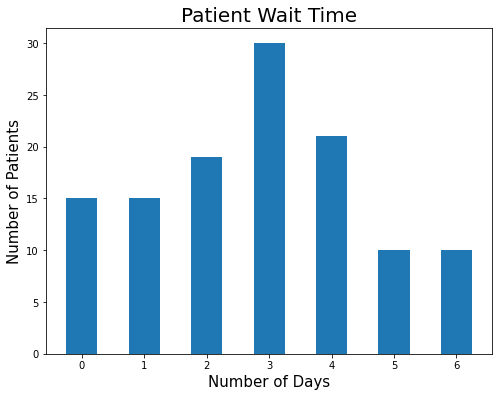

Counter({4: 21, 3: 30, 0: 15, 2: 19, 1: 15, 5: 10, 6: 10})

In [77]:
#Separate the occurence of each element according to their frequency
data = collections.Counter(Counter(wait_time(d1_pat_schedule,d2_pat_schedule,C)))
plt.figure(figsize=(8,6))
plt.bar(data.keys(), data.values(), width=0.5)
plt.xlabel("Number of Days", fontsize=15)
plt.ylabel("Number of Patients", fontsize=15)
plt.title("Patient Wait Time", fontsize=20)
plt.savefig("wait_time_bar_plot.png", transparent=True, bbox_inches='tight')
plt.show()
data

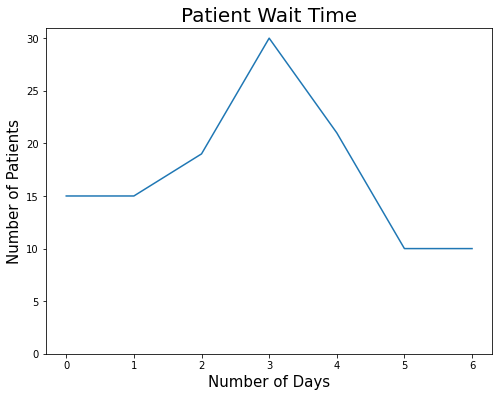

In [78]:
#Let us have a lineplot for the above bar graph
plt.figure(figsize=(8, 6))
sns.lineplot(list(data.keys()), list(data.values()))
plt.title("Patient Wait Time", fontsize=20)
plt.xlabel("Number of Days", fontsize=15)
plt.ylabel("Number of Patients", fontsize=15)
#plt.figure(figsize=(20,10)) 
plt.yticks([0, 5, 10, 15, 20, 25, 30], fontsize=10)
plt.savefig("wait_time_line_plot.png", transparent=True, bbox_inches='tight')
plt.show()